In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_rows', 25990)
pd.set_option('display.max_columns', 200)

In [4]:
sheet1=pd.read_csv("/content/drive/MyDrive/CP_UMBC/Feature_Engneering/Merged/merged_clean_vA1_20251130_2201.csv")

In [5]:
sheet1.shape

(17441, 31)

In [6]:
print("Shape:", sheet1.shape)
print("\nColumns:")
print(sheet1.columns.tolist())

print("\nInfo:")
sheet1.info()

print("\nSummary of numeric features:")
sheet1.describe()


Shape: (17441, 31)

Columns:
['MatricStatusOfficialDescr', 'MatricGenderIPEDS', 'MatricIPEDSEthnicity', 'MatricResidence', 'Graduated', 'Sem1_FTPT', 'MatricResidencyTuitionDescript', 'HighSchoolGpa', 'HighSchoolGPABandDescription', 'SATMathScore', 'SATReadingWritingScore', 'HighSchoolWeightedRankPercentile', 'HS_PecentileDesc', 'AlgSCORE', 'CalScore', 'ALEKSScore', 'EngSCORE', 'AP_CRDS', 'TotalSupport', 'Supported', 'NeedStatus', 'SupportBin', 'AP_total_transfer_credits', 'AP_max_score', 'AP_ct_art', 'AP_ct_computer', 'AP_ct_english', 'AP_ct_language', 'AP_ct_math', 'AP_ct_social', 'AP_ct_stem']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17441 entries, 0 to 17440
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MatricStatusOfficialDescr         17441 non-null  object 
 1   MatricGenderIPEDS                 17441 non-null  object 
 2   MatricIPEDSEthnicity    

,HighSchoolGpa,SATMathScore,SATReadingWritingScore,HighSchoolWeightedRankPercentile,AlgSCORE,CalScore,ALEKSScore,EngSCORE,AP_CRDS,TotalSupport,AP_total_transfer_credits,AP_max_score,AP_ct_art,AP_ct_computer,AP_ct_english,AP_ct_language,AP_ct_math,AP_ct_social,AP_ct_stem
count,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000,17441.000000
mean,2.963191,223.467118,218.155496,20.235078,4.165013,2.492804,35.604782,1.145118,5.000917,22224.070911,5.007568,1.996158,0.023049,0.153661,0.246201,0.055501,0.406055,0.791870,0.329167
std,1.773397,312.627629,304.521353,35.145163,9.814948,6.743589,39.227761,1.942046,7.363077,21482.467091,7.539662,2.172872,0.197277,0.450674,0.523464,0.235871,0.745257,1.263017,0.691663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5698.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.230000,600.000000,600.000000,41.000000,0.000000,0.000000,78.000000,4.000000,9.000000,32000.000000,9.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5.060000,800.000000,800.000000,100.000000,32.000000,25.000000,100.000000,9.000000,55.000000,159102.000000,208.000000,5.000000,3.000000,16.000000,16.000000,2.000000,16.000000,32.000000,6.000000


The final cleaned dataset contains 17,441 students who have 31 variables that measure their demographics and academic preparation and financial support and placement scores and AP credits and residency status and graduation results. The preprocessing steps resulted in a fully non-missing dataset.

The dataset includes:

12 categorical variables

19 numeric variables

The numeric variables in high school GPA and SAT scores and ALEKS/placement scores and AP credits enable researchers to model academic readiness while TotalSupport and SupportBin and NeedStatus variables show financial status.


 Matric Status (Freshman vs Transfer)
MatricStatusOfficialDescr
New Freshman    11937
New Transfer     5504
Name: count, dtype: int64

Graduation rate by Matric Status:
MatricStatusOfficialDescr
New Freshman    0.440060
New Transfer    0.605378
Name: Graduated, dtype: float64


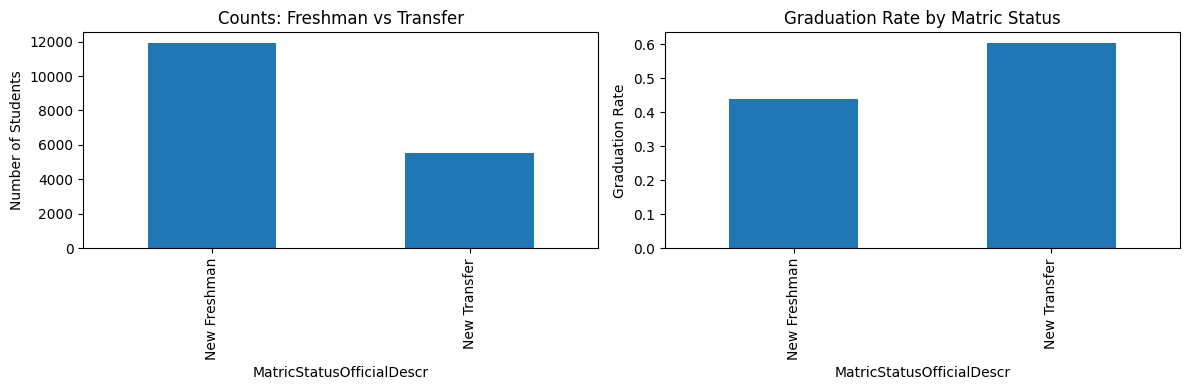

In [7]:
print("\n Matric Status (Freshman vs Transfer)")
print(sheet1["MatricStatusOfficialDescr"].value_counts())

print("\nGraduation rate by Matric Status:")
print(
    sheet1.groupby("MatricStatusOfficialDescr")["Graduated"]
    .apply(lambda x: (x=="Yes").mean())
)


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Count plot
sheet1["MatricStatusOfficialDescr"].value_counts().plot(
    kind='bar', ax=ax[0]
)
ax[0].set_title("Counts: Freshman vs Transfer")
ax[0].set_ylabel("Number of Students")

# Graduation rate bar
(sheet1.groupby("MatricStatusOfficialDescr")["Graduated"]
 .apply(lambda x: (x=="Yes").mean())
).plot(kind='bar', ax=ax[1])
ax[1].set_title("Graduation Rate by Matric Status")
ax[1].set_ylabel("Graduation Rate")

plt.tight_layout()
plt.show()


The dataset contains 11,937 first-time freshmen (68%) and 5,504 transfer students (32%). Graduation outcomes differ sharply between these two groups. First-time freshmen graduate at a rate of 0.440, while transfer students graduate at a substantially higher rate of 0.605.


Gender Distribution
MatricGenderIPEDS
Male      10448
Female     6993
Name: count, dtype: int64

Graduation rate by Gender:
MatricGenderIPEDS
Female    0.517518
Male      0.475306
Name: Graduated, dtype: float64


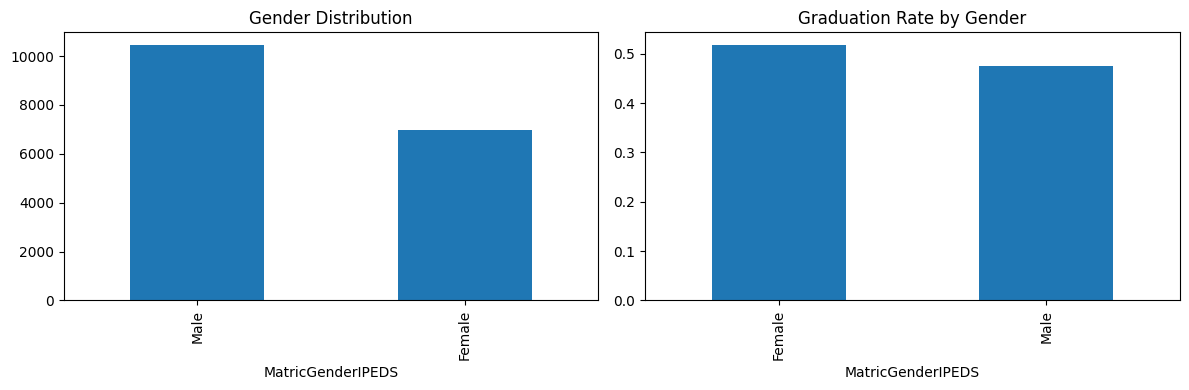

In [10]:
print("\nGender Distribution")
print(sheet1["MatricGenderIPEDS"].value_counts())

print("\nGraduation rate by Gender:")
print(
    sheet1.groupby("MatricGenderIPEDS")["Graduated"]
    .apply(lambda x: (x=="Yes").mean())
)


fig, ax = plt.subplots(1,2, figsize=(12,4))

sheet1["MatricGenderIPEDS"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Gender Distribution")

(sheet1.groupby("MatricGenderIPEDS")["Graduated"]
 .apply(lambda x: (x=='Yes').mean())
).plot(kind="bar", ax=ax[1])
ax[1].set_title("Graduation Rate by Gender")

plt.tight_layout()
plt.show()


The gender distribution consists of 10,448 male and 6,993 female students. Female students achieve a graduation rate of 0.518, which is moderately higher than the 0.475 rate observed for male students. This pattern aligns with longstanding higher-education trends where female students consistently demonstrate stronger persistence and degree completion. The difference, while not large, is consistent and suggests that female students show slightly greater academic stability and progression across cohorts in this institution.


Residence Type
MatricResidence
Commuter     9237
On Campus    8204
Name: count, dtype: int64

Graduation rate by Residence:
MatricResidence
Commuter     0.501137
On Campus    0.482204
Name: Graduated, dtype: float64


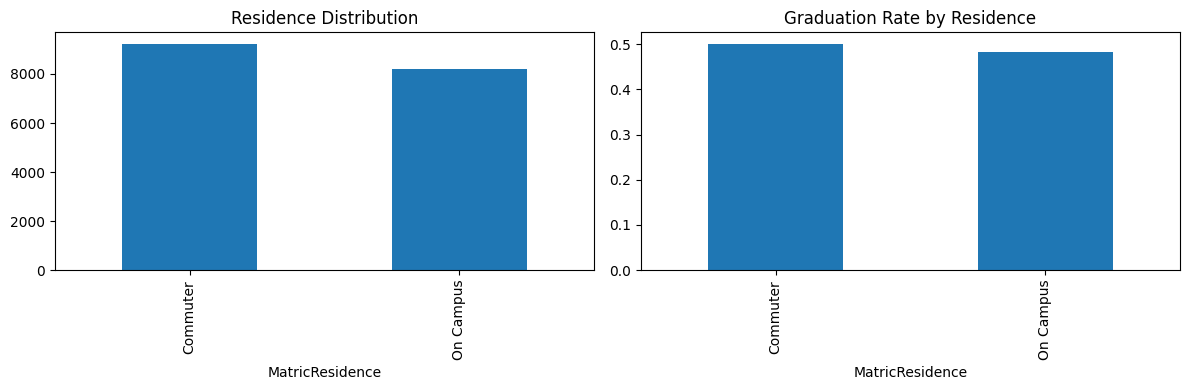

In [11]:
print("\nResidence Type")
print(sheet1["MatricResidence"].value_counts())

print("\nGraduation rate by Residence:")
print(
    sheet1.groupby("MatricResidence")["Graduated"]
    .apply(lambda x: (x=="Yes").mean())
)


fig, ax = plt.subplots(1,2, figsize=(12,4))

sheet1["MatricResidence"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Residence Distribution")

(sheet1.groupby("MatricResidence")["Graduated"]
 .apply(lambda x: (x=='Yes').mean())
).plot(kind="bar", ax=ax[1])
ax[1].set_title("Graduation Rate by Residence")

plt.tight_layout()
plt.show()


The dataset is evenly split between commuter and on-campus students. Graduation outcomes show a small difference: commuters graduate at 50.1%, slightly higher than the 48.2% rate for on-campus students. This suggests that residence status has only a minor influence on graduation, with commuters showing a modest advantage


 Ethnicity Distribution
MatricIPEDSEthnicity
White                                     5401
Asian                                     4811
Black/African American                    3918
Hispanic/Latino                           1283
Two or More                                834
International                              662
Not Specified                              497
American Indian/Alaska Native               15
Native Hawaiian/Other Pacific Islander      12
Unknown                                      8
Name: count, dtype: int64

Graduation rate by Ethnicity:
MatricIPEDSEthnicity
American Indian/Alaska Native             0.466667
Asian                                     0.505716
Black/African American                    0.423175
Hispanic/Latino                           0.416991
International                             0.433535
Native Hawaiian/Other Pacific Islander    0.333333
Not Specified                             0.641851
Two or More                               0.40527

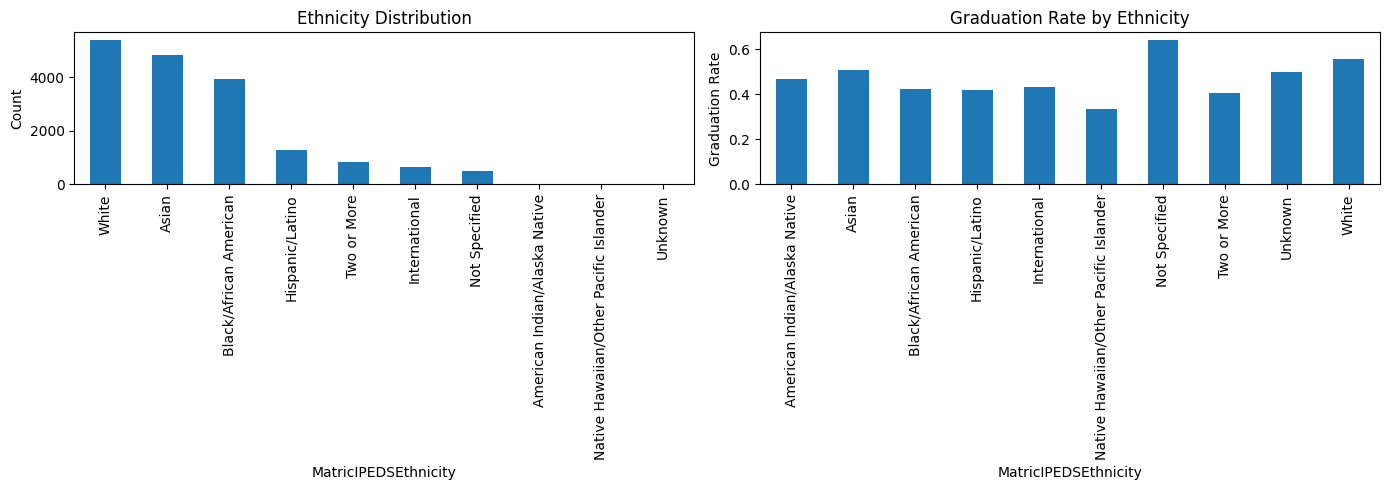

In [12]:
print("\n Ethnicity Distribution")
print(sheet1["MatricIPEDSEthnicity"].value_counts())

print("\nGraduation rate by Ethnicity:")
print(
    sheet1.groupby("MatricIPEDSEthnicity")["Graduated"]
    .apply(lambda x: (x=="Yes").mean())
)


fig, ax = plt.subplots(1,2, figsize=(14,5))

sheet1["MatricIPEDSEthnicity"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Ethnicity Distribution")
ax[0].set_ylabel("Count")

(sheet1.groupby("MatricIPEDSEthnicity")["Graduated"]
 .apply(lambda x: (x=='Yes').mean())
).plot(kind="bar", ax=ax[1])
ax[1].set_title("Graduation Rate by Ethnicity")
ax[1].set_ylabel("Graduation Rate")

plt.tight_layout()
plt.show()


In [13]:
# Filter Not Specified group
ns = sheet1[sheet1["MatricIPEDSEthnicity"] == "Not Specified"]

print("Count:", len(ns))
print("\nGraduation Rate:", (ns["Graduated"]=="Yes").mean())

#  Matriculation status
print("\n--- Matriculation Status ---")
print(ns["MatricStatusOfficialDescr"].value_counts(normalize=True))

# Financial support
print("\n--- Support Bin ---")
print(ns["SupportBin"].value_counts(normalize=True))

# Need status
print("\n--- Need Status ---")
print(ns["NeedStatus"].value_counts(normalize=True))

# Placement scores
print("\n--- Placement Score Means ---")
print(ns[["ALEKSScore","EngSCORE","SATMathScore","SATReadingWritingScore"]].mean())

# High school GPA distribution
print("\n--- GPA Band ---")
print(ns["HighSchoolGPABandDescription"].value_counts(normalize=True))

# Transfer credits (AP)
print("\n--- AP Transfer Credits ---")
print(ns["AP_total_transfer_credits"].describe())

# Full-time vs part-time
print("\n--- Sem1 FT/PT ---")
print(ns["Sem1_FTPT"].value_counts(normalize=True))

# 8. Residence
print("\n--- Residence ---")
print(ns["MatricResidence"].value_counts(normalize=True))


Count: 497

Graduation Rate: 0.641851106639839

--- Matriculation Status ---
MatricStatusOfficialDescr
New Transfer    0.54326
New Freshman    0.45674
Name: proportion, dtype: float64

--- Support Bin ---
SupportBin
>20K       0.408451
<5K        0.249497
5K-10K     0.134809
10K-15K    0.114688
15K-20K    0.092555
Name: proportion, dtype: float64

--- Need Status ---
NeedStatus
Yes    0.889336
No     0.110664
Name: proportion, dtype: float64

--- Placement Score Means ---
ALEKSScore                15.730382
EngSCORE                   1.110664
SATMathScore              65.191147
SATReadingWritingScore    63.340040
dtype: float64

--- GPA Band ---
HighSchoolGPABandDescription
Unknown       0.454728
4.0 - 4.49    0.193159
3.5 - 3.99    0.167002
4.5 - 5.00    0.092555
3.0 - 3.49    0.060362
2.5 - 2.99    0.026157
2.3 - 2.49    0.004024
Under 2.0     0.002012
Name: proportion, dtype: float64

--- AP Transfer Credits ---
count    497.000000
mean       3.871227
std        6.966185
min        

The dataset includes strong representation from White, Asian, and Black/African American students, while other groups appear in smaller numbers. Graduation outcomes vary across categories. White (55.5%) and Asian (50.6%) students show the highest graduation rates among major groups, while Black/African American (42.3%) and Hispanic/Latino (41.7%) students show lower rates. Very small subgroups—such as Native Hawaiian/Pacific Islander and American Indian/Alaska Native—display unstable rates due to small sample sizes.

The high graduation rate of the “Not Specified” ethnicity group (64.2%) is explained by its structural composition rather than by the ethnicity label itself. Over 54% of these students are transfer students, who graduate at much higher rates. In addition, more than 40% receive >$20K in institutional aid, nearly 90% are full-time, and many hold significant transfer credits, indicating strong academic readiness. Because this group consists largely of academically prepared, well-supported transfer students, its graduation rate appears elevated despite limited high-school GPA data.


--- Support Bin Distribution ---
SupportBin
>20K       7295
<5K        4106
5K-10K     2385
10K-15K    2118
15K-20K    1537
Name: count, dtype: int64

Graduation rate by SupportBin:
SupportBin
10K-15K    0.412653
15K-20K    0.610280
5K-10K     0.327463
<5K        0.283488
>20K       0.661823
Name: Graduated, dtype: float64


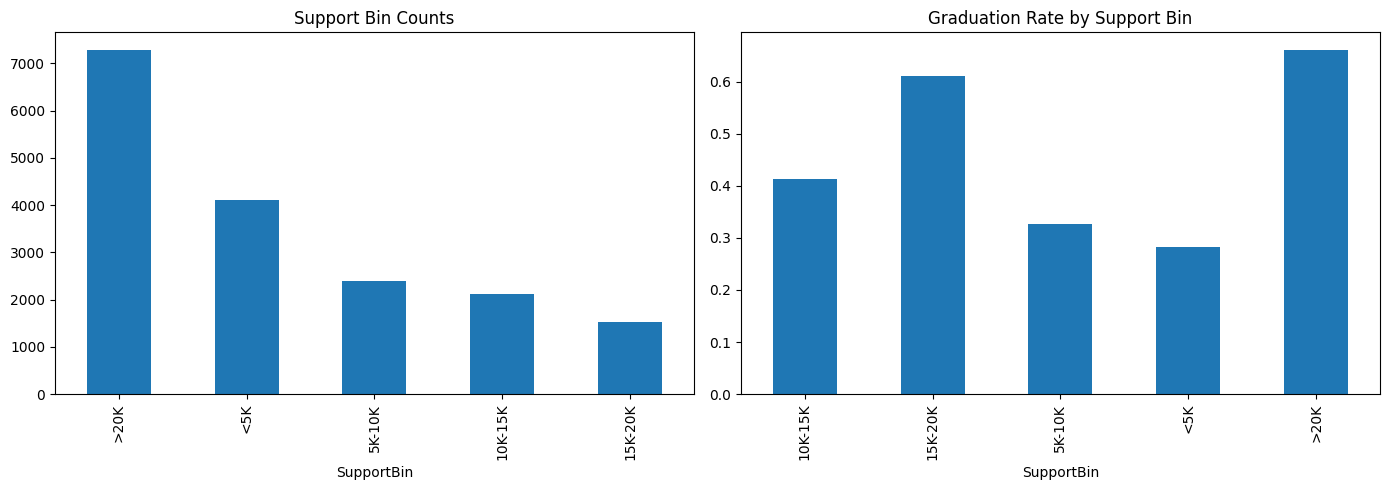

In [24]:
print("\nSupport Bin Distribution")
print(sheet1["SupportBin"].value_counts())

print("\nGraduation rate by SupportBin:")
print(
    sheet1.groupby("SupportBin")["Graduated"]
    .apply(lambda x: (x=='Yes').mean())
)


fig, ax = plt.subplots(1,2, figsize=(14,5))

sheet1["SupportBin"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("Support Bin Counts")

(sheet1.groupby("SupportBin")["Graduated"]
 .apply(lambda x: (x=='Yes').mean())
).plot(kind="bar", ax=ax[1])
ax[1].set_title("Graduation Rate by Support Bin")

plt.tight_layout()
plt.show()


Students receiving higher institutional support graduate at significantly higher rates. The >20K group shows the strongest outcome (66%), followed by 15K–20K (61%). Graduation drops sharply for lower-support groups, falling to 28–33% for students receiving <10K. This pattern clearly indicates that financial support is one of the strongest early predictors of graduation, with substantial aid associated with noticeably higher persistence and completion.


--- NeedStatus Distribution ---
NeedStatus
Yes    15590
No      1851
Name: count, dtype: int64

Graduation rate by NeedStatus:
NeedStatus
No     0.418693
Yes    0.500962
Name: Graduated, dtype: float64


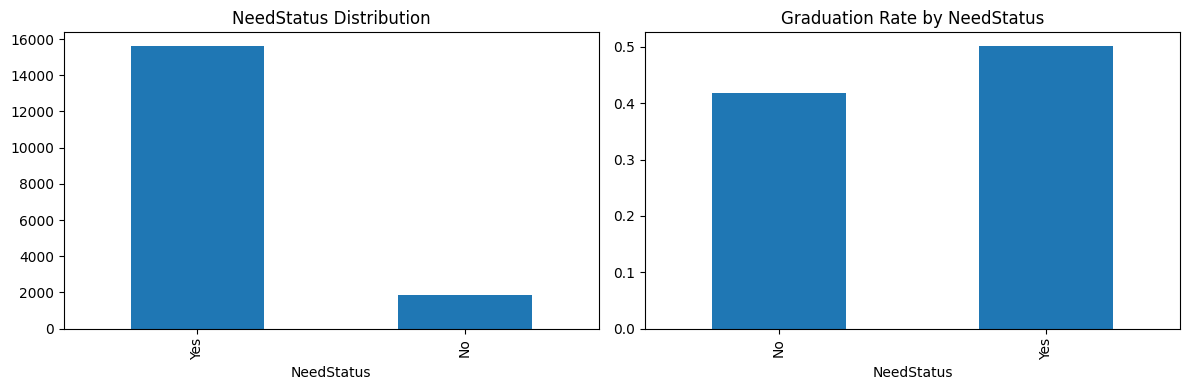

In [25]:
print("\nNeedStatus Distribution")
print(sheet1["NeedStatus"].value_counts())

print("\nGraduation rate by NeedStatus:")
print(
    sheet1.groupby("NeedStatus")["Graduated"]
    .apply(lambda x: (x=='Yes').mean())
)


fig, ax = plt.subplots(1,2, figsize=(12,4))

sheet1["NeedStatus"].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title("NeedStatus Distribution")

(sheet1.groupby("NeedStatus")["Graduated"]
 .apply(lambda x: (x=='Yes').mean())
).plot(kind="bar", ax=ax[1])
ax[1].set_title("Graduation Rate by NeedStatus")

plt.tight_layout()
plt.show()
